<a href="https://colab.research.google.com/github/KLeeDE/TextAnalysis/blob/master/practice/20200919_ADP_textanalysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP Text Analysis Research 

**연구자**: 고인환, 박지원, 박현선, 이경민

더반플랫폼임시작업반(ADP)에 참여한 국가 간 협상 그룹 간 CBDR-RC에 대한 입장이 어떻게 구분되고 변화해왔는지 추적함. 궁극적으로는 Annex I - Non-Annex I 간의 갈등 양상이 아닌 Shared Responsibility vs Differentiated Responsibility 를 주장하는 국가 군 간의 갈등으로 CBDR-RC에 대한 담론이 진화하고 있다는 기존의 선행연구를 경험적으로 뒷받침하고자 함.


# Wordfish-python (Under development)

Link: http://www.wordfish.org/

Wordfish is a computer program written in the **R statistical language** to extract political positions from text documents. Word frequencies are used to place documents onto a single dimension. Wordfish is a scaling technique and does not need any anchoring documents to perform the analysis. Instead, it relies on a statistical model of word counts. The current implementation assumes a Poisson distribution of word frequencies. Positions are estimated using an expectation-maximization algorithm. Confidence intervals for estimated positions can be generated from a parametric bootstrap.The name Wordfish pays tribute to the French meaning of the word “poisson”.

In [ ]:
!pip install git+git://github.com/word-fish/wordfish-python.git

  Cloning git://github.com/word-fish/wordfish-python.git to /tmp/pip-req-build-tn2txt6u
  Running command git clone -q git://github.com/word-fish/wordfish-python.git /tmp/pip-req-build-tn2txt6u
     |████████████████████████████████| 163kB 2.8MB/s 
     |████████████████████████████████| 71kB 3.9MB/s 
  Created wheel for wordfish: filename=wordfish-1.2.0-cp36-none-any.whl size=2591011 sha256=1c6966b60eb027ce2fcfecf0fde81f7242c37a8797c1c45c6fbcf852bef86a71
  Stored in directory: /tmp/pip-ephem-wheel-cache-q9n4p7sl/wheels/a8/04/cd/c5ffae8ae9727b2da8a6273fcd656a6275e4786edf83270b2d
Successfully built wordfish


Wordfish-python

Link: https://github.com/word-fish/wordfish-python

**under development! not ready for use!**

# Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import statsmodels.formula
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fname = "/content/drive/My Drive/BWRN-ADP/data/adp_clean_csv.csv"
adp = pd.read_csv(fname, sep='delimiter')
adp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,"doc_id,session,part,time,date,group,text"
0,"1,2,1,1,20130429,ailac,""Thank you Co-Chairs, I..."
1,"2,2,1,1,20130429,aosis,""Distinguished Co-Chair..."
2,"3,2,1,1,20130429,arab,""Distinguished Co-Chairs..."
3,"4,2,1,1,20130429,eig,""Mr. Co-Chairs, This stat..."
4,"5,2,1,1,20130429,eu,""I have the honour to spea..."
...,...
173,"174,2,12,12,20151205,crn,""Thank you Mr. Co-Cha..."
174,"175,2,12,12,20151205,eig,""Mr. Co-Chairs, dear ..."
175,"176,2,12,12,20151205,eu,""The EU and its Member..."
176,"177,2,12,12,20151205,g77china,""Co-Chairs I hav..."


In [ ]:
list(adp.columns)

['doc_id,session,part,time,date,group,text']

In [ ]:
# -- 타입 확인
type(adp["doc_id,session,part,time,date,group,text"].iloc[0])

str

In [ ]:
adp["column_list"] = adp["doc_id,session,part,time,date,group,text"].str.split(',')
adp

,"doc_id,session,part,time,date,group,text",column_list
0,"1,2,1,1,20130429,ailac,""Thank you Co-Chairs, I...","[1, 2, 1, 1, 20130429, ailac, ""Thank you Co-Ch..."
1,"2,2,1,1,20130429,aosis,""Distinguished Co-Chair...","[2, 2, 1, 1, 20130429, aosis, ""Distinguished C..."
2,"3,2,1,1,20130429,arab,""Distinguished Co-Chairs...","[3, 2, 1, 1, 20130429, arab, ""Distinguished Co..."
3,"4,2,1,1,20130429,eig,""Mr. Co-Chairs, This stat...","[4, 2, 1, 1, 20130429, eig, ""Mr. Co-Chairs, T..."
4,"5,2,1,1,20130429,eu,""I have the honour to spea...","[5, 2, 1, 1, 20130429, eu, ""I have the honour ..."
...,...,...
173,"174,2,12,12,20151205,crn,""Thank you Mr. Co-Cha...","[174, 2, 12, 12, 20151205, crn, ""Thank you Mr...."
174,"175,2,12,12,20151205,eig,""Mr. Co-Chairs, dear ...","[175, 2, 12, 12, 20151205, eig, ""Mr. Co-Chairs..."
175,"176,2,12,12,20151205,eu,""The EU and its Member...","[176, 2, 12, 12, 20151205, eu, ""The EU and its..."
176,"177,2,12,12,20151205,g77china,""Co-Chairs I hav...","[177, 2, 12, 12, 20151205, g77china, ""Co-Chair..."


In [ ]:
adp["doc_id"], adp["session"], adp["part"], adp["time"], adp["date"], adp["group"], adp["text"] = adp["doc_id,session,part,time,date,group,text"].str.split(',', 6).str
adp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,"doc_id,session,part,time,date,group,text",column_list,doc_id,session,part,time,date,group,text
0,"1,2,1,1,20130429,ailac,""Thank you Co-Chairs, I...","[1, 2, 1, 1, 20130429, ailac, ""Thank you Co-Ch...",1,2,1,1,20130429,ailac,"""Thank you Co-Chairs, I have the honor of spea..."
1,"2,2,1,1,20130429,aosis,""Distinguished Co-Chair...","[2, 2, 1, 1, 20130429, aosis, ""Distinguished C...",2,2,1,1,20130429,aosis,"""Distinguished Co-Chairs, Excellencies, Collea..."
2,"3,2,1,1,20130429,arab,""Distinguished Co-Chairs...","[3, 2, 1, 1, 20130429, arab, ""Distinguished Co...",3,2,1,1,20130429,arab,"""Distinguished Co-Chairs I have the honor to t..."
3,"4,2,1,1,20130429,eig,""Mr. Co-Chairs, This stat...","[4, 2, 1, 1, 20130429, eig, ""Mr. Co-Chairs, T...",4,2,1,1,20130429,eig,"""Mr. Co-Chairs, This statement is made on beha..."
4,"5,2,1,1,20130429,eu,""I have the honour to spea...","[5, 2, 1, 1, 20130429, eu, ""I have the honour ...",5,2,1,1,20130429,eu,"""I have the honour to speak on behalf of the E..."
...,...,...,...,...,...,...,...,...,...
173,"174,2,12,12,20151205,crn,""Thank you Mr. Co-Cha...","[174, 2, 12, 12, 20151205, crn, ""Thank you Mr....",174,2,12,12,20151205,crn,"""Thank you Mr. Co-Chairs, Panama has the honou..."
174,"175,2,12,12,20151205,eig,""Mr. Co-Chairs, dear ...","[175, 2, 12, 12, 20151205, eig, ""Mr. Co-Chairs...",175,2,12,12,20151205,eig,"""Mr. Co-Chairs, dear colleagues I have the ple..."
175,"176,2,12,12,20151205,eu,""The EU and its Member...","[176, 2, 12, 12, 20151205, eu, ""The EU and its...",176,2,12,12,20151205,eu,"""The EU and its Member States would like to th..."
176,"177,2,12,12,20151205,g77china,""Co-Chairs I hav...","[177, 2, 12, 12, 20151205, g77china, ""Co-Chair...",177,2,12,12,20151205,g77china,"""Co-Chairs I have the honour to speak on behal..."


In [ ]:
type(adp["date"].iloc[0])
adp["date"]

0      20130429
1      20130429
2      20130429
3      20130429
4      20130429
         ...   
173    20151205
174    20151205
175    20151205
176    20151205
177    20151205
Name: date, Length: 178, dtype: object

In [ ]:
adp["year"] = adp["date"].str.slice(start=0, stop=4)
adp

,"doc_id,session,part,time,date,group,text",column_list,doc_id,session,part,time,date,group,text,year
0,"1,2,1,1,20130429,ailac,""Thank you Co-Chairs, I...","[1, 2, 1, 1, 20130429, ailac, ""Thank you Co-Ch...",1,2,1,1,20130429,ailac,"""Thank you Co-Chairs, I have the honor of spea...",2013
1,"2,2,1,1,20130429,aosis,""Distinguished Co-Chair...","[2, 2, 1, 1, 20130429, aosis, ""Distinguished C...",2,2,1,1,20130429,aosis,"""Distinguished Co-Chairs, Excellencies, Collea...",2013
2,"3,2,1,1,20130429,arab,""Distinguished Co-Chairs...","[3, 2, 1, 1, 20130429, arab, ""Distinguished Co...",3,2,1,1,20130429,arab,"""Distinguished Co-Chairs I have the honor to t...",2013
3,"4,2,1,1,20130429,eig,""Mr. Co-Chairs, This stat...","[4, 2, 1, 1, 20130429, eig, ""Mr. Co-Chairs, T...",4,2,1,1,20130429,eig,"""Mr. Co-Chairs, This statement is made on beha...",2013
4,"5,2,1,1,20130429,eu,""I have the honour to spea...","[5, 2, 1, 1, 20130429, eu, ""I have the honour ...",5,2,1,1,20130429,eu,"""I have the honour to speak on behalf of the E...",2013
...,...,...,...,...,...,...,...,...,...,...
173,"174,2,12,12,20151205,crn,""Thank you Mr. Co-Cha...","[174, 2, 12, 12, 20151205, crn, ""Thank you Mr....",174,2,12,12,20151205,crn,"""Thank you Mr. Co-Chairs, Panama has the honou...",2015
174,"175,2,12,12,20151205,eig,""Mr. Co-Chairs, dear ...","[175, 2, 12, 12, 20151205, eig, ""Mr. Co-Chairs...",175,2,12,12,20151205,eig,"""Mr. Co-Chairs, dear colleagues I have the ple...",2015
175,"176,2,12,12,20151205,eu,""The EU and its Member...","[176, 2, 12, 12, 20151205, eu, ""The EU and its...",176,2,12,12,20151205,eu,"""The EU and its Member States would like to th...",2015
176,"177,2,12,12,20151205,g77china,""Co-Chairs I hav...","[177, 2, 12, 12, 20151205, g77china, ""Co-Chair...",177,2,12,12,20151205,g77china,"""Co-Chairs I have the honour to speak on behal...",2015


In [ ]:
cols_sub = ['doc_id', 'session', 'part', 'time', 'date', 'year', 'group', 'text']
adp_sub = adp[cols_sub]
adp_sub

,doc_id,session,part,time,date,year,group,text
0,1,2,1,1,20130429,2013,ailac,"""Thank you Co-Chairs, I have the honor of spea..."
1,2,2,1,1,20130429,2013,aosis,"""Distinguished Co-Chairs, Excellencies, Collea..."
2,3,2,1,1,20130429,2013,arab,"""Distinguished Co-Chairs I have the honor to t..."
3,4,2,1,1,20130429,2013,eig,"""Mr. Co-Chairs, This statement is made on beha..."
4,5,2,1,1,20130429,2013,eu,"""I have the honour to speak on behalf of the E..."
...,...,...,...,...,...,...,...,...
173,174,2,12,12,20151205,2015,crn,"""Thank you Mr. Co-Chairs, Panama has the honou..."
174,175,2,12,12,20151205,2015,eig,"""Mr. Co-Chairs, dear colleagues I have the ple..."
175,176,2,12,12,20151205,2015,eu,"""The EU and its Member States would like to th..."
176,177,2,12,12,20151205,2015,g77china,"""Co-Chairs I have the honour to speak on behal..."


In [ ]:
group = np.unique(adp["group"])
group

array(['ag', 'ailac', 'alba', 'aosis', 'arab', 'basic', 'caricom',
       'cartegena', 'crn', 'eig', 'eu', 'g77china', 'ldc', 'lmdc', 'mldc',
       'sica', 'umbrella'], dtype=object)

# Data Description

In [ ]:
# -- Data 
adp_sub_pt = adp_sub.copy()
cols_sub_pt = ['part', 'text']
adp_sub_part = adp_sub_pt[cols_sub_pt]
adp_sub_part = adp_sub_part.groupby("part").count()
adp_sub_part

,text
part,
1,8
10,13
11,11
12,13
2,28
3,13
4,21
5,13
6,17


Text(0.5, 1.0, 'Number of ADP documents by part (2013-2015)')

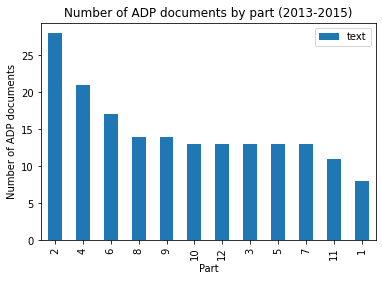

In [ ]:
ax_pt = adp_sub_part.sort_values("text", ascending=False).reset_index().plot.bar("part", "text")
xlab = ax_pt.set_xlabel("Part")
ylab = ax_pt.set_ylabel("Number of ADP documents")
ax_pt.set_title("Number of ADP documents by part (2013-2015)")

In [ ]:
adp_sub_yr = adp_sub.copy()
cols_sub_yr = ['year', 'text']
adp_sub_year = adp_sub_yr[cols_sub_yr]
adp_sub_year = adp_sub_year.groupby("year").count()
adp_sub_year

,text
year,
2013,49
2014,64
2015,65


Text(0.5, 1.0, 'Number of ADP documents by year (2013-2015)')

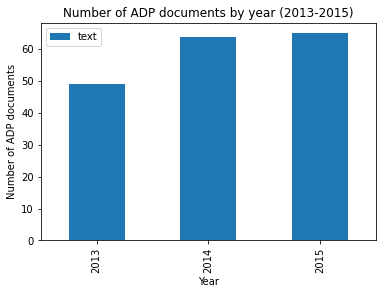

In [ ]:
ax_yr = adp_sub_year.sort_values("text").reset_index().plot.bar("year", "text")
xlab = ax_yr.set_xlabel("Year")
ylab = ax_yr.set_ylabel("Number of ADP documents")
ax_yr.set_title("Number of ADP documents by year (2013-2015)")

In [ ]:
adp_sub_gr = adp_sub.copy()
cols_sub_gr = ['group', 'text']
adp_sub_group = adp_sub_gr[cols_sub_gr]
adp_sub_group = adp_sub_group.groupby("group").count()
adp_sub_group

,text
group,
ag,12
ailac,16
alba,9
aosis,15
arab,3
basic,13
caricom,2
cartegena,1
crn,10


Text(0.5, 1.0, 'Number of statements by group (2013-2015)')

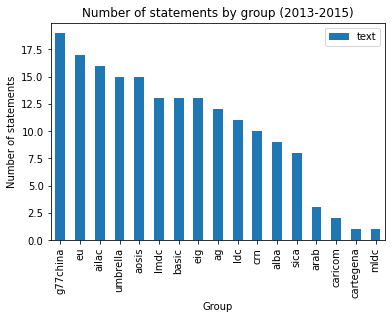

In [ ]:
ax_gr = adp_sub_group.sort_values("text", ascending=False).reset_index().plot.bar("group", "text")
xlab = ax_gr.set_xlabel("Group")
ylab = ax_gr.set_ylabel("Number of statements")
ax_gr.set_title("Number of statements by group (2013-2015)")

# Text Analysis (Practice)

조진희(2019)는 텍스트 스케일링 모형인 워드피쉬(wordfish)를 활용하여 1988년 부터 2003년 사이에 창당된 대한민국정당의 정강정책을 분석하였다. 텍스트 스케일링 모형은 정당들의 이념적인 위치를 횡단, 종단면적으로 비교하기에 유용하다. 

단어들의 상대적인 빈도를 비교하면 문서들의 이념적 위치를 추정할 수 있다. 그룹 i의 ADP document에서 단어 j가 언급되는 횟수를 C_ij라고 하고, 이것이 평균인 ij인 포아송 분포를 따른다고 가정하자. 다른 세개으 ㅣ파라미터가 추정되는데 정당 고정효과, 단어 고정효과, 정당의 아념적 위치 차별화 정도가 있다. 이 모형은 기대극화 알고리즘에 의해 추정될 수 있다. 

모형 추정 결과를 통해 정당들의 이념적 위치를 충분히 차별적으로 표현하고 있음을 알 수 있다. 추정 결과를 바탕으로 정당 경쟁의 주요 이슈 차원을 밝히고 정당 양극화의 양상을 논의한다. 

참고문헌:  조진희(2019) 정강정책으로 본 대한민국 정당 이념지도 1988-2003, 의정논총, 14:1, 5-27



In [ ]:
adp_sub_txt = adp_sub.copy()

# text 열에서 "climate", "climate change" 단어가 포함된 행 찾기 
# 단어는 바꿀 수 있음. 이를 통해 특정 단어 빈도수 찾을 수 있음. 
print(adp_sub_txt["text"].str.contains("climate", "climate change"))

0       True
1       True
2       True
3       True
4       True
       ...  
173     True
174    False
175    False
176     True
177     True
Name: text, Length: 178, dtype: bool


In [ ]:
# text 열에서 "climate", "climate change" 단어가 포함된 수 및 비율 계산
nclimate = adp_sub_txt["text"].str.contains("climate").sum()
nclimatec = adp_sub_txt["text"].str.contains("climate change").sum()
nall = len(adp_sub_txt["text"])
print(nclimate)
print(nclimatec)
print(nall)
print(round(nclimate/nall,2))

137
118
178
0.77


In [ ]:
# 문자열 데이터 처리 위해 lower() 사용
adp_sub_txt = adp_sub.copy()
type(adp_sub_txt["text"].iloc[0])

adp_sub_txt["text"].iloc[0] = adp_sub_txt["text"].iloc[0].lower()
adp_sub_txt

,doc_id,session,part,time,date,year,group,text
0,1,2,1,1,20130429,2013,ailac,"""thank you co-chairs, i have the honor of spea..."
1,2,2,1,1,20130429,2013,aosis,"""Distinguished Co-Chairs, Excellencies, Collea..."
2,3,2,1,1,20130429,2013,arab,"""Distinguished Co-Chairs I have the honor to t..."
3,4,2,1,1,20130429,2013,eig,"""Mr. Co-Chairs, This statement is made on beha..."
4,5,2,1,1,20130429,2013,eu,"""I have the honour to speak on behalf of the E..."
...,...,...,...,...,...,...,...,...
173,174,2,12,12,20151205,2015,crn,"""Thank you Mr. Co-Chairs, Panama has the honou..."
174,175,2,12,12,20151205,2015,eig,"""Mr. Co-Chairs, dear colleagues I have the ple..."
175,176,2,12,12,20151205,2015,eu,"""The EU and its Member States would like to th..."
176,177,2,12,12,20151205,2015,g77china,"""Co-Chairs I have the honour to speak on behal..."


In [ ]:
adp_sub_txt.index

RangeIndex(start=0, stop=178, step=1)

In [ ]:
for ii in range(0, 178):
  adp_sub_txt["text"].iloc[ii] = adp_sub_txt["text"].iloc[ii].lower() 

In [ ]:
adp_sub_txt

,doc_id,session,part,time,date,year,group,text
0,1,2,1,1,20130429,2013,ailac,"""thank you co-chairs, i have the honor of spea..."
1,2,2,1,1,20130429,2013,aosis,"""distinguished co-chairs, excellencies, collea..."
2,3,2,1,1,20130429,2013,arab,"""distinguished co-chairs i have the honor to t..."
3,4,2,1,1,20130429,2013,eig,"""mr. co-chairs, this statement is made on beha..."
4,5,2,1,1,20130429,2013,eu,"""i have the honour to speak on behalf of the e..."
...,...,...,...,...,...,...,...,...
173,174,2,12,12,20151205,2015,crn,"""thank you mr. co-chairs, panama has the honou..."
174,175,2,12,12,20151205,2015,eig,"""mr. co-chairs, dear colleagues i have the ple..."
175,176,2,12,12,20151205,2015,eu,"""the eu and its member states would like to th..."
176,177,2,12,12,20151205,2015,g77china,"""co-chairs i have the honour to speak on behal..."


In [ ]:
adp_sub_txt.to_csv('/content/drive/My Drive/BWRN-ADP/data/adp_low_csv.csv')

In [ ]:
# Test: 문자 수준에서 text 수 계산
# 단어 수준으로 바꾸려면 module 찾아봐야함
frequency = {}

for word in adp_sub_txt["text"].iloc[0]:
    count = frequency.get(word,0)
    frequency[word] = count + 1

frequency_list = frequency.keys()

for words in frequency_list:
  print(words, frequency[words])

" 2
t 382
h 183
a 315
n 321
k 16
  821
y 41
o 330
u 121
c 151
- 1
i 338
r 225
s 242
, 29
v 54
e 541
f 93
p 94
g 78
b 54
l 172
d 118
m 84
) 1
. 34
w 84
j 11
z 5
x 8
q 1
2 5
? 3
: 1
; 2
0 2
1 2
3 1
5 2
4 1


# Machine Learning (TBC)


**텍스트 마이닝**

대량의 텍스트 데이터셋에서 규칙들을 찾아내는 것, 문자로 된 다른 자료들로부터 자동적으로 정보를 추출하는 이전에 알려지지 않은 새로운 정보의 발견

1. 요소 단위에 따른 접근: 문자 수준, 단어 수준, 구 수준, 문장 수준, 초록 수준, 전문 수준, 전체 문헌집단 수준
2. 기법적인 측면에서의 접근: 지도학습 (supervised learning), 비지도학습 (unsupervised learning)

**텍스트 마이닝 파이썬 패키지 7가지**

beautifulsoup4, JPype1, pygame, simplejson, Pytagcloud, Twitter, koLNPy

* beautifulsoup4: Beautiful Soup is a Python library for pulling data out of HTML and XML files.

**Top 10 Python Libraries for Natural Language Processing (2018)** [Link](https://kleiber.me/blog/2018/02/25/top-10-python-nlp-libraries-2018/)
* spaCy: Extremely optimized NLP library that is meant to be operated together with deep learning frameworks such as TensorFlow or PyTorch.

**토픽 모델링(topic modeling): 단어 군집화**

기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법입니다.


**Question?**
* target:
*object:
*feature:




**spaCy (Practice)**

Link: https://spacy.io/usage/spacy-101#annotations

In [ ]:
#spaCy
# https://spacy.io/usage/models#download
!pip install -U spacy

     |████████████████████████████████| 10.0MB 2.8MB/s 
     |████████████████████████████████| 2.1MB 46.2MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!pip install spacy

In [ ]:
import en_core_web_sm

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
nlp = en_core_web_sm.load()

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [ ]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
tokens = nlp("dog cat banana afskfsd")
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.266302 True
cat True 19.220264 True
banana True 17.748499 True
afskfsd True 20.882006 True


In [ ]:
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.47130838
dog banana 0.3275862
cat dog 0.47130838
cat cat 1.0
cat banana 0.3547838
banana dog 0.3275862
banana cat 0.3547838
banana banana 1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """


In [ ]:
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee

3197928453018144401
coffee


In [ ]:
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en


In [ ]:
from spacy.tokens import Doc
from spacy.vocab import Vocab

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")  # Original Doc
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee' 

empty_doc = Doc(Vocab())  # New Doc with empty Vocab
# empty_doc.vocab.strings[3197928453018144401] will raise an error :(

empty_doc.vocab.strings.add("coffee")  # Add "coffee" and generate hash
print(empty_doc.vocab.strings[3197928453018144401])  # 'coffee' 

new_doc = Doc(doc.vocab)  # Create new doc with first doc's vocab
print(new_doc.vocab.strings[3197928453018144401])  # 'coffee' 

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


3197928453018144401
coffee
coffee
coffee


In [ ]:
from spacy.kb import KnowledgeBase

# load the model and create an empty KB
nlp = spacy.load('en_core_web_sm')
kb = KnowledgeBase(vocab=nlp.vocab, entity_vector_length=3)

# adding entities
kb.add_entity(entity="Q1004791", freq=6, entity_vector=[0, 3, 5])
kb.add_entity(entity="Q42", freq=342, entity_vector=[1, 9, -3])
kb.add_entity(entity="Q5301561", freq=12, entity_vector=[-2, 4, 2])

# adding aliases
kb.add_alias(alias="Douglas", entities=["Q1004791", "Q42", "Q5301561"], probabilities=[0.6, 0.1, 0.2])
kb.add_alias(alias="Douglas Adams", entities=["Q42"], probabilities=[0.9])

print()
print("Number of entities in KB:",kb.get_size_entities()) # 3
print("Number of aliases in KB:", kb.get_size_aliases()) # 2

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)



Number of entities in KB: 3
Number of aliases in KB: 2


In [ ]:
from spacy.kb import KnowledgeBase

nlp = spacy.load('en_core_web_sm')
kb = KnowledgeBase(vocab=nlp.vocab, entity_vector_length=3)

# adding entities
kb.add_entity(entity="Q1004791", freq=6, entity_vector=[0, 3, 5])
kb.add_entity(entity="Q42", freq=342, entity_vector=[1, 9, -3])
kb.add_entity(entity="Q5301561", freq=12, entity_vector=[-2, 4, 2])

# adding aliases
kb.add_alias(alias="Douglas", entities=["Q1004791", "Q42", "Q5301561"], probabilities=[0.6, 0.1, 0.2])

candidates = kb.get_candidates("Douglas")
for c in candidates:
    print(" ", c.entity_, c.prior_prob, c.entity_vector)

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


  Q1004791 0.6000000238418579 [0.0, 3.0, 5.0]
  Q42 0.10000000149011612 [1.0, 9.0, -3.0]
  Q5301561 0.20000000298023224 [-2.0, 4.0, 2.0]
